# Web Scraping Data Using Python with Pandas

### Using 'read_html' for scraping data of a webpage

In [6]:
# Web-page used for this exercise is - https://www.basketball-reference.com/leagues/NBA_2024_per_game.html
# Tutorial Video - https://www.youtube.com/watch?v=ooj84UP3r6M
# Reference Github repository - https://github.com/dataprofessor/code/blob/master/python/pandas_read_html_for_webscraping.ipynb

# Building block
year = '2024'
urlstr = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

# Combining the urlstr and year
url = urlstr.format(year)
url

'https://www.basketball-reference.com/leagues/NBA_2024_per_game.html'

In [7]:
# To get the list of urls by replacing years
years = ['2024', '2023', '2022', '2021']
urlstr = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'
for year in years:
    url = urlstr.format(year)
    print(url)

https://www.basketball-reference.com/leagues/NBA_2024_per_game.html
https://www.basketball-reference.com/leagues/NBA_2023_per_game.html
https://www.basketball-reference.com/leagues/NBA_2022_per_game.html
https://www.basketball-reference.com/leagues/NBA_2021_per_game.html


In [8]:
# Use pandas to read html data
import pandas as pd

In [9]:
# Using only 2023 data
year = '2023'
url = urlstr.format(year)
url
df = pd.read_html(url, header=0)
df[0].shape

(705, 30)

In [10]:
# Let's name the table for 2024 as df2024
df2023 = df[0]
df2023.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [11]:
# Finding out repeated headers on the webpage
len(df2023[df2023['Age'] == 'Age'])

26

In [12]:
# Cleaning out data by removing duplicate headers
df2023.drop(df2023[df2023['Age'] == 'Age'].index, inplace=True)

In [13]:
df2023.shape

(679, 30)

In [14]:
df2023.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [15]:
df2023.drop_duplicates(subset=['Player'], keep='first', inplace=True)

In [16]:
df2023.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [17]:
df2023.to_excel('2023 NBA Rankings.xlsx', sheet_name='2023')

In [18]:
# Charting the data
import matplotlib.pyplot as plt

In [19]:
df2023.convert_dtypes()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
701,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
702,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
703,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


In [20]:
##df2023 = df2023.convert_dtypes()
df2023['Age'] = df2023['Age'].astype(int)
df2023['G'] = df2023['G'].astype(int)
df2023['GS'] = df2023['GS'].astype(int)
df2023['Rk'] = df2023['Rk'].astype(int)
df2023['Player'] = df2023['Player'].astype(str)
df2023['Pos'] = df2023['Pos'].astype(str)
df2023['Tm'] = df2023['Tm'].astype(str)
df2023.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [21]:
len(df2023.columns)
i = 7

while i < 30:
   df2023[df2023.columns[i]] = df2023[df2023.columns[i]].astype(float)
   i = i + 1


In [22]:
df2023.dtypes

Rk          int32
Player     object
Pos        object
Age         int32
Tm         object
G           int32
GS          int32
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [23]:
df2023.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [24]:
df2023.to_excel('2023 NBA Rankings.xlsx', sheet_name='2023')

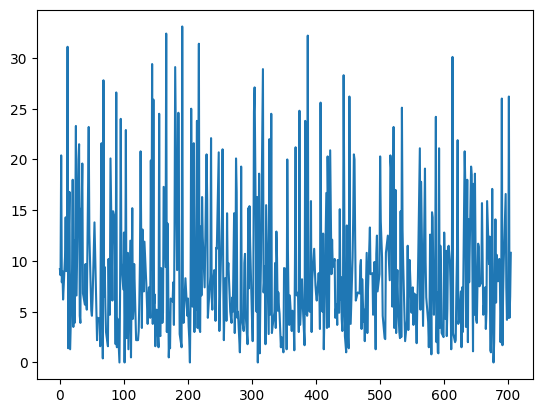

In [25]:
df2023['PTS'].plot()
plt.show()

<Axes: xlabel='FGA', ylabel='PTS'>

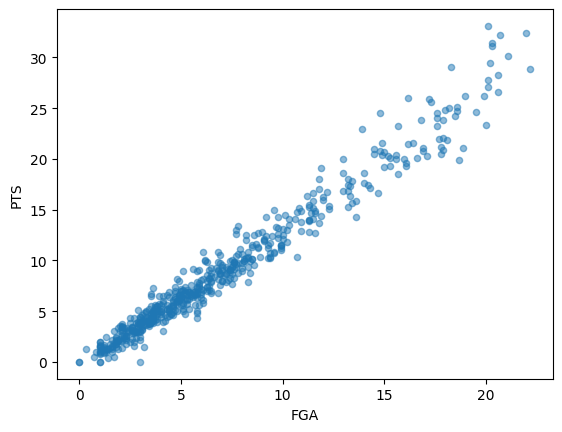

In [26]:
# Creating Scatter chart
df2023.plot.scatter(x="FGA", y='PTS', alpha=0.5)

In [28]:
# Check out specific datatypes in dataframe
df2023.select_dtypes(include=['number'])

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,23,55,12,20.7,3.6,7.3,0.485,0.5,2.0,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,29,42,42,27.0,3.7,6.3,0.597,0.0,0.0,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,25,75,75,34.6,8.0,14.9,0.540,0.0,0.2,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,22,59,22,20.5,2.8,6.5,0.427,1.4,3.9,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,22,77,20,21.8,3.2,6.8,0.470,1.2,3.5,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,535,34,54,9,14.7,2.0,3.7,0.545,0.1,0.6,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
701,536,24,73,73,34.8,8.2,19.0,0.429,2.1,6.3,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
702,537,24,9,0,9.2,1.8,3.0,0.593,0.3,0.8,...,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
703,538,30,15,2,14.5,2.5,3.9,0.627,0.0,0.1,...,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


In [29]:
# Selecting all Object datatypes
df2023.select_dtypes(include=['object'])

,Player,Pos,Tm
0,Precious Achiuwa,C,TOR
1,Steven Adams,C,MEM
2,Bam Adebayo,C,MIA
3,Ochai Agbaji,SG,UTA
4,Santi Aldama,PF,MEM
...,...,...,...
700,Thaddeus Young,PF,TOR
701,Trae Young,PG,ATL
702,Omer Yurtseven,C,MIA
703,Cody Zeller,C,MIA


In [30]:
# Selecting all Float datatypes
df2023.select_dtypes(include=['float'])

,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,20.7,3.6,7.3,0.485,0.5,2.0,0.269,3.0,5.4,0.564,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,27.0,3.7,6.3,0.597,0.0,0.0,0.000,3.7,6.2,0.599,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,34.6,8.0,14.9,0.540,0.0,0.2,0.083,8.0,14.7,0.545,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,20.5,2.8,6.5,0.427,1.4,3.9,0.355,1.4,2.7,0.532,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,21.8,3.2,6.8,0.470,1.2,3.5,0.353,2.0,3.4,0.591,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,14.7,2.0,3.7,0.545,0.1,0.6,0.176,1.9,3.0,0.622,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
701,34.8,8.2,19.0,0.429,2.1,6.3,0.335,6.1,12.7,0.476,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
702,9.2,1.8,3.0,0.593,0.3,0.8,0.429,1.4,2.2,0.650,...,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
703,14.5,2.5,3.9,0.627,0.0,0.1,0.000,2.5,3.8,0.649,...,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


## Conditional Selections

In [32]:
# Conditional Selection : Subsets
# 1. Which player scored the most points (PTS) per game. Return full row.
# df2023['PTS'].max()  - Gives the player with max PTS
df2023[df2023['PTS'] == df2023['PTS'].max()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
191,143,Joel Embiid,C,28,PHI,66,66,34.6,11.0,20.1,...,0.857,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1


In [33]:
# Finding out the team of the player with Max PTS.
# Save the above in a variable
playerMaxPTS = df2023[df2023['PTS'] == df2023['PTS'].max()]
# Team of the above player
playerMaxPTS['Tm']

191    PHI
Name: Tm, dtype: object

In [34]:
# How many games did the player play
playerMaxPTS['G']

191    66
Name: G, dtype: int32

In [35]:
# Which players scored more than 20 points per game (PTS)
df2023[df2023['PTS'] > 20]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
12,11,Giannis Antetokounmpo,PF,28,MIL,63,63,32.1,11.2,20.3,...,0.645,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1
25,21,LaMelo Ball,PG,21,CHO,36,36,35.2,8.2,20.0,...,0.836,1.2,5.3,6.4,8.4,1.3,0.3,3.6,3.3,23.3
30,24,Desmond Bane,SG,24,MEM,58,58,31.7,7.8,16.2,...,0.883,0.7,4.3,5.0,4.4,1.0,0.4,2.2,2.6,21.5
45,35,Bradley Beal,SG,29,WAS,50,50,33.5,8.9,17.6,...,0.842,0.8,3.1,3.9,5.4,0.9,0.7,2.9,2.1,23.2
65,46,Bojan Bogdanović,PF,33,DET,59,59,32.1,7.3,14.9,...,0.884,0.6,3.2,3.8,2.6,0.6,0.1,2.3,1.9,21.6
68,49,Devin Booker,SG,26,PHO,53,53,34.6,9.9,20.1,...,0.855,0.9,3.7,4.5,5.5,1.0,0.3,2.7,3.0,27.8
79,58,Mikal Bridges,SF-SG,26,TOT,83,83,35.7,7.1,15.3,...,0.895,1.0,3.4,4.4,3.3,1.1,0.7,1.5,1.9,20.1
88,64,Jaylen Brown,SF,26,BOS,67,67,35.9,10.1,20.6,...,0.765,1.2,5.7,6.9,3.5,1.1,0.4,2.9,2.6,26.6
95,69,Jalen Brunson,PG,26,NYK,68,68,35.0,8.6,17.6,...,0.829,0.6,3.0,3.5,6.2,0.9,0.2,2.1,2.2,24.0


### GroupBy() Function

In [40]:
# Which players are from Los Angeles Lakers?
lal = df2023.groupby('Tm').get_group('LAL')
lal

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
93,67,Sterling Brown,SF,27,LAL,4,0,6.0,0.0,1.0,...,NaN,0.8,1.3,2.0,0.5,0.8,0.0,0.0,1.0,0.0
94,68,Troy Brown Jr.,SF,23,LAL,76,45,24.5,2.6,6.1,...,0.872,0.8,3.2,4.1,1.3,0.8,0.2,0.6,1.6,7.1
123,90,Max Christie,SG,19,LAL,41,3,12.5,1.1,2.6,...,0.875,0.2,1.7,1.8,0.5,0.2,0.2,0.3,0.8,3.1
146,110,Anthony Davis,C,29,LAL,56,54,34.0,9.7,17.2,...,0.784,3.5,9.1,12.5,2.6,1.1,2.0,2.2,2.6,25.9
207,155,Wenyen Gabriel,C,25,LAL,68,2,15.1,2.3,3.8,...,0.619,1.7,2.5,4.2,0.5,0.4,0.5,0.7,2.1,5.5
317,239,LeBron James,PF,38,LAL,55,54,35.5,11.1,22.2,...,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9
508,384,Scotty Pippen Jr.,PG,22,LAL,6,0,5.3,0.7,2.0,...,0.556,0.3,0.3,0.7,0.3,0.3,0.2,0.3,0.5,2.3
535,406,Austin Reaves,SG,24,LAL,64,22,28.8,4.0,7.7,...,0.864,0.5,2.5,3.0,3.4,0.5,0.3,1.5,1.7,13.0
578,434,Dennis Schröder,PG,29,LAL,66,50,30.1,4.1,9.8,...,0.857,0.3,2.2,2.5,4.5,0.8,0.2,1.7,2.2,12.6
611,463,Cole Swider,SF,23,LAL,7,0,5.9,0.4,1.3,...,NaN,0.1,0.9,1.0,0.6,0.0,0.0,0.0,0.4,1.3


In [41]:
# Which players scored the highest PTS in the Los Angeles Lakers?
lal[lal['PTS'] == lal['PTS'].max()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
317,239,LeBron James,PF,38,LAL,55,54,35.5,11.1,22.2,...,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9


In [49]:
# Of the 5 positions which position scored the most points?
df2023.groupby('Pos')['PTS'].describe()
#pos['PTS'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,108.0,8.137037,5.882186,0.5,3.900,6.60,10.800,33.1
PF,102.0,9.236275,7.152882,0.0,4.400,7.40,11.150,31.1
PF-C,1.0,6.400000,NaN,6.4,6.400,6.40,6.400,6.4
PF-SF,1.0,7.500000,NaN,7.5,7.500,7.50,7.500,7.5
PG,92.0,10.504348,8.091427,0.0,4.275,7.85,14.450,32.4
PG-SG,2.0,16.050000,15.627060,5.0,10.525,16.05,21.575,27.1
SF,103.0,8.811650,6.600762,0.0,4.050,6.90,12.150,30.1
SF-PF,1.0,6.600000,NaN,6.6,6.600,6.60,6.600,6.6
SF-SG,2.0,12.100000,11.313708,4.1,8.100,12.10,16.100,20.1


In [52]:
# Showing the 5 traditional positions
positions = ['C', 'PF', 'PG', 'SF', 'SG']
POS = df2023[df2023['Pos'].isin(positions)]
POS


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
701,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
702,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
703,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


In [53]:
# Now lets look at the descriptive statistics
POS.groupby('Pos')['PTS'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,108.0,8.137037,5.882186,0.5,3.900,6.60,10.80,33.1
PF,102.0,9.236275,7.152882,0.0,4.400,7.40,11.15,31.1
PG,92.0,10.504348,8.091427,0.0,4.275,7.85,14.45,32.4
SF,103.0,8.811650,6.600762,0.0,4.050,6.90,12.15,30.1
SG,125.0,8.969600,6.377066,0.0,4.400,7.90,11.70,28.3


### Creat histograms to visualize above data

In [57]:
PTS = df2023[['Pos', 'PTS']]
PTS = PTS[PTS['Pos'].isin(positions)]
PTS

,Pos,PTS
0,C,9.2
1,C,8.6
2,C,20.4
3,SG,7.9
4,PF,9.0
...,...,...
700,PF,4.4
701,PG,26.2
702,C,4.4
703,C,6.5


array([[<Axes: title={'center': 'C'}>, <Axes: title={'center': 'PF'}>],
       [<Axes: title={'center': 'PG'}>, <Axes: title={'center': 'SF'}>],
       [<Axes: title={'center': 'SG'}>, <Axes: >]], dtype=object)

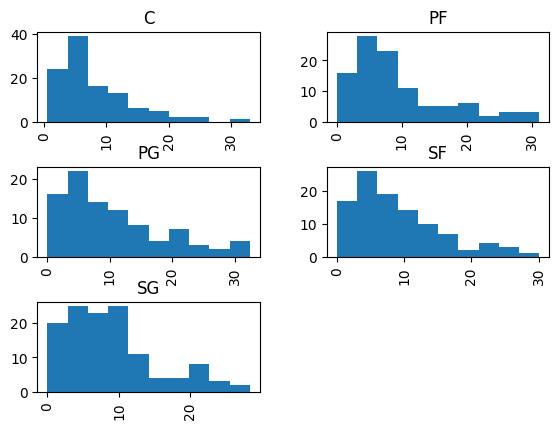

In [58]:
# Pandas built-in histograms
PTS['PTS'].hist(by=PTS['Pos'])

array([<Axes: title={'center': 'C'}>, <Axes: title={'center': 'PF'}>,
       <Axes: title={'center': 'PG'}>, <Axes: title={'center': 'SF'}>,
       <Axes: title={'center': 'SG'}>], dtype=object)

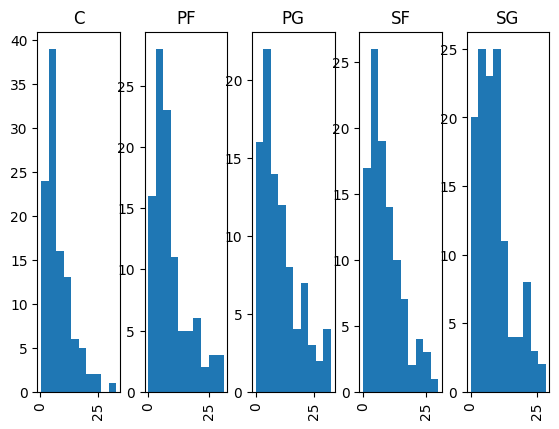

In [64]:
# Changing the layout
PTS['PTS'].hist(by=PTS['Pos'], layout=(1,5))

array([<Axes: title={'center': 'C'}>, <Axes: title={'center': 'PF'}>,
       <Axes: title={'center': 'PG'}>, <Axes: title={'center': 'SF'}>,
       <Axes: title={'center': 'SG'}>], dtype=object)

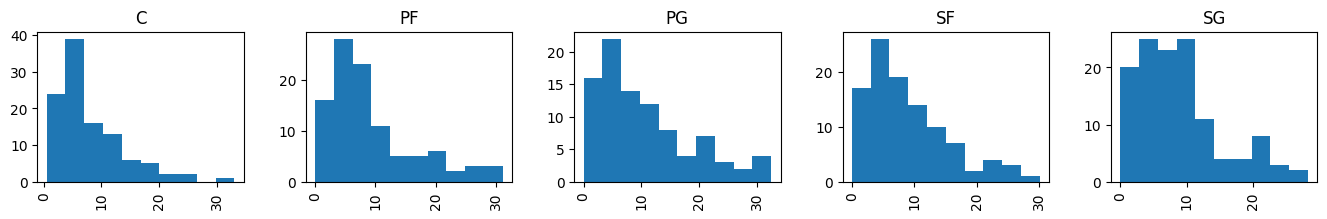

In [67]:
# Modify the width by using figsize
PTS['PTS'].hist(by=PTS['Pos'], layout=(1,5), figsize=(16,2))